In [91]:
import requests
import pandas as pd
import cv2
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
#from keras.preprocessing import image

%matplotlib inline


%store -r WORKDIR

#if 'WORKDIR' not in dir():
WORKDIR = 'C:/Users/cammy/OneDrive/MIT IA/git/projeto_dogs/dogs_brand'



baseurl = 'https://dog.ceo/api/'

listurl = baseurl + 'breeds/list/all'
randomappend = '/images/random/'

data_raw_file = WORKDIR + '/Data/Raw/dogs.parquet'

maxBreeds = 10
maxImages = 50
#testImages = 3

img_h, img_w = 64, 64 # Altura e largura das imagens

#breeds = []

In [92]:
WORKDIR

'C:/Users/cammy/OneDrive/MIT IA/git/projeto_dogs/dogs_brand'

# Busca Lista de Raças

In [93]:
obj = requests.get(listurl).json()
allbreeds = pd.DataFrame.from_dict(obj)
allbreeds.head()

,message,status
affenpinscher,[],success
african,[],success
airedale,[],success
akita,[],success
appenzeller,[],success


In [94]:
breeds = allbreeds.index
if maxBreeds > 0:
    breeds = allbreeds [0:maxBreeds].index
    

# Ler imagens

In [95]:
def ler_imagem(url):

# For remote, use urllib, as per "http://stackoverflow.com/questions/21061814"
    req = urllib.request.urlopen(url)

    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

    img = cv2.imdecode(arr,-1)

# The important part - Correct BGR to RGB channel
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imres = cv2.resize(img, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
#    imres = image.img_to_array(imres.T)
#    imres = np.expand_dims(imres, axis = 0)
# converter para cinza

# Plot
#    plt.figure()  
#    plt.imshow(imres)
    return imres

In [96]:
imageurls = []
dogimages = []
rotulos = []
dataset = np.ndarray((len(breeds) * maxImages, img_h, img_w, 3), dtype=np.uint8)
i = 0

for breed in breeds:
    filesurl = baseurl + 'breed/' + breed + randomappend + str(maxImages)
    imageurl = requests.get(filesurl).json()
    print(imageurl)
    breedimages = pd.DataFrame.from_dict(imageurl['message'])
    imageurls.append(breedimages)
    for images in breedimages.values:
        img = ler_imagem(images[0])
        dataset[i] = img
        rotulos.append(breed)
        dogimages.append(img.flatten())
        i = i+1

{'message': ['https://images.dog.ceo/breeds/affenpinscher/n02110627_10447.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_10986.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11263.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11283.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11614.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11663.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11782.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11783.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_11853.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_12003.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_12227.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_12272.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_12391.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n02110627_12579.jpg', 'https://images.dog.ceo/breeds/affenpinscher/n021

In [97]:
rotulos

['affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'affenpinscher',
 'african',
 'african',
 'african',
 'african',
 'african',
 'african',
 'african',
 'african',
 'af

In [98]:
dataset.shape

(500, 64, 64, 3)

In [99]:
dogimages

[array([111, 109, 111, ...,  59,  56,  55], dtype=uint8),
 array([133, 100,  56, ..., 185, 162, 116], dtype=uint8),
 array([56, 55, 51, ..., 57, 51, 49], dtype=uint8),
 array([110,  89,  84, ..., 246, 111, 111], dtype=uint8),
 array([200,  19,  56, ...,  47,  12,   0], dtype=uint8),
 array([ 81,  76,  46, ..., 234, 208, 172], dtype=uint8),
 array([  1,  10,   7, ..., 207, 208, 208], dtype=uint8),
 array([163, 130, 113, ..., 155, 148, 129], dtype=uint8),
 array([23, 25, 22, ..., 58, 46, 33], dtype=uint8),
 array([241, 241, 241, ..., 228, 230, 229], dtype=uint8),
 array([216, 206, 214, ..., 160, 106,  95], dtype=uint8),
 array([189, 201, 175, ...,  23,  30,  24], dtype=uint8),
 array([ 58,  70, 119, ..., 114, 139,  83], dtype=uint8),
 array([ 60, 115,  72, ..., 219, 241, 174], dtype=uint8),
 array([163, 149, 140, ..., 140, 141, 143], dtype=uint8),
 array([141,  72,  30, ..., 125, 111, 100], dtype=uint8),
 array([ 80,  85,  89, ..., 151, 146, 142], dtype=uint8),
 array([130, 133,  90, ...

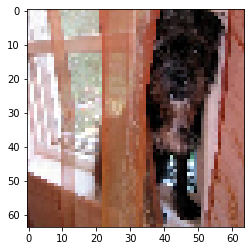

affenpinscher


In [100]:
# view an image (e.g. 20) and print its corresponding label
img_index = 10
plt.imshow(dataset[img_index,:,:,:])
plt.show()
print(rotulos[img_index])

In [101]:
df = pd.DataFrame(dogimages)
df['breed'] = rotulos

In [102]:
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,breed
0,111,109,111,114,111,113,114,115,116,118,...,50,49,47,55,54,52,59,56,55,affenpinscher
1,133,100,56,131,103,63,97,68,38,109,...,211,185,136,164,143,86,185,162,116,affenpinscher
2,56,55,51,58,57,53,64,63,59,63,...,82,71,59,53,50,48,57,51,49,affenpinscher
3,110,89,84,133,112,107,95,74,69,135,...,206,67,65,217,84,80,246,111,111,affenpinscher
4,200,19,56,198,17,51,188,8,40,183,...,145,116,101,115,78,61,47,12,0,affenpinscher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,165,136,120,161,132,116,140,111,97,170,...,90,86,42,103,89,47,101,97,58,borzoi
409,55,90,20,38,74,1,51,88,13,69,...,45,47,34,36,38,24,43,45,33,borzoi
410,60,50,41,45,35,26,60,48,39,88,...,134,138,83,79,81,35,141,144,94,borzoi
411,154,122,138,149,128,192,77,68,97,234,...,92,87,30,115,107,60,107,96,48,borzoi


In [103]:
df.columns = df.columns.astype(str)
df.to_parquet(data_raw_file)